In [31]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as ac

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [33]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 96F3-7600

 Directory of C:\Users\Beauty\Documents\ExcelR\Assignments\A_6_logistic_regression

13-07-2022  12:07    <DIR>          .
13-07-2022  12:07    <DIR>          ..
02-07-2022  16:12    <DIR>          .ipynb_checkpoints
13-07-2022  12:07            44,623 assignment6_logistic_regression.ipynb
02-07-2022  17:02         3,751,306 bank-full.csv
02-07-2022  09:17               108 Problem-Statement(Bank_data).txt
               3 File(s)      3,796,037 bytes
               3 Dir(s)  123,051,646,976 bytes free


# Problem Statement: Predict whether the client has subscribed a term deposit or not. Binomial ("yes" or "no")

In [34]:
df=pd.read_csv("bank-full.csv")

In [35]:
df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [36]:
df.shape

(45211, 17)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# Details of Features

# Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

# related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

# other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

# EDA

In [38]:
df[["y"]].value_counts()    # The data is Imbalanced--> We have to use confusion matrix

y  
no     39922
yes     5289
dtype: int64

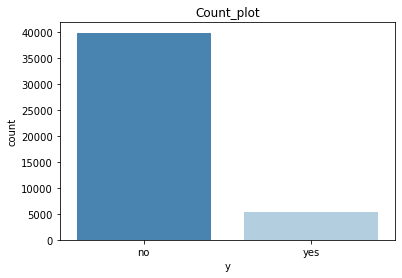

In [41]:
sns.countplot(x=df.y,data=df,palette='Blues_r')
plt.title('Count_plot')
plt.show()

In [45]:
count_no=len(df[df['y']=='no'])
count_yes=len(df[df['y']=='yes'])
print("The number of customers not buying the subscription are: ",count_no)
print("The number of customers buying the subscription are: ",count_yes)
per_no=((count_no)/(count_no+count_yes))*100
per_yes=((count_yes)/(count_no+count_yes))*100
print("Percentage of people buying the subscription: ",np.round(per_yes,2),'%')
print("Percentage of people not buying the subscription: ",np.round(per_no,2),'%')

The number of customers not buying the subscription are:  39922
The number of customers buying the subscription are:  5289
Percentage of people buying the subscription:  11.7 %
Percentage of people not buying the subscription:  88.3 %


In [46]:
df.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


Observations:
1. The average age of people buying the subscription is higher than those who are not buying the subcription
2. The avg call duration for people who bought the subscription is higher than the people who did not nuy the subscription.
3. The avg number of contacts performed during the campaign are lower for the customers who bought the subscription.

In [48]:
df.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630
blue-collar,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693
self-employed,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092


In [49]:
df.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373
married,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552
single,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690


In [50]:
df.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous
education,,,,,,,
primary,45.865567,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272
secondary,39.964270,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753
tertiary,39.593640,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980
unknown,44.510501,1526.754443,15.810985,257.313947,2.849219,36.856220,0.488422


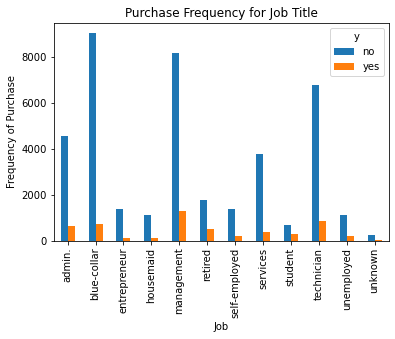

In [56]:
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase');

The frequency of purchase of the deposit depends a highly on the job title. Thus, the job title can be a good predictor of the outcome variable.

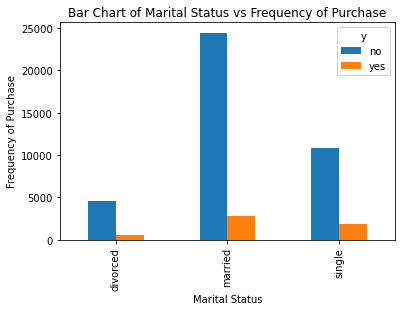

In [58]:
pd.crosstab(df.marital,df.y).plot(kind='bar')
plt.title('Bar Chart of Marital Status vs Frequency of Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Frequency of Purchase');

The marital status does not seem a strong predictor for the outcome variable.

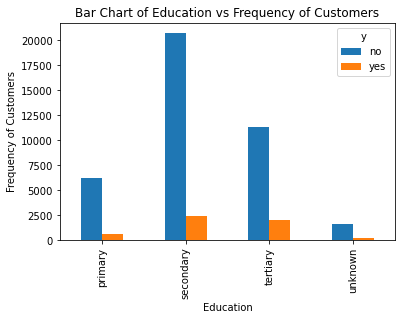

In [69]:
pd.crosstab(df.education,df.y).plot(kind='bar')
#table.plot(kind='bar', stacked=True)
plt.title('Bar Chart of Education vs Frequency of Customers')
plt.xlabel('Education')
plt.ylabel('Frequency of Customers');

Education seems a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency of Purchase')

<Figure size 1440x1080 with 0 Axes>

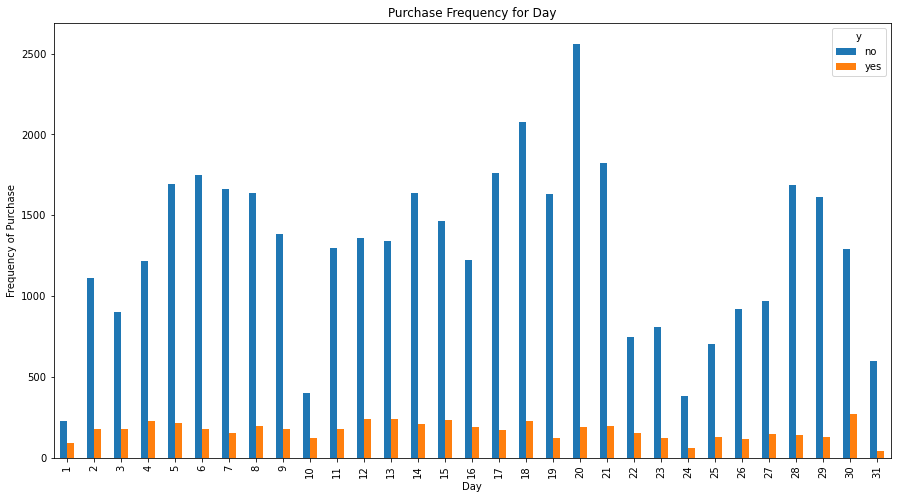

In [72]:
pd.crosstab(df.day,df.y).plot(kind='bar',figsize=(15,8))
plt.title('Purchase Frequency for Day')
plt.xlabel('Day')
plt.ylabel('Frequency of Purchase')

Day may not be a good predictor of the outcome.

Text(0, 0.5, 'Frequency of Purchase')

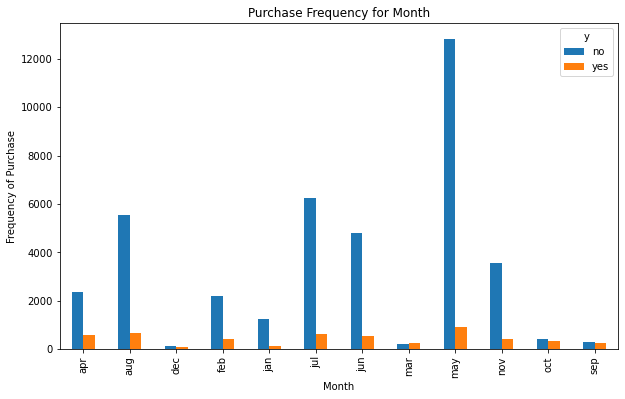

In [74]:
pd.crosstab(df.month,df.y).plot(kind='bar',figsize=(10,6))
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')

Month might be a good predictor of the outcome variable.

Text(0, 0.5, 'Frequency')

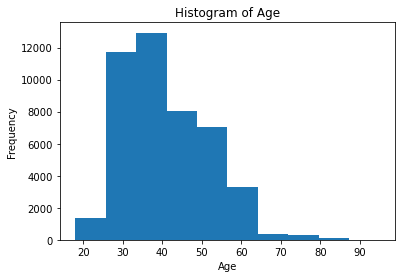

In [84]:
plt.hist(df.age,histtype='bar')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Majority of the customers of the bank are in the age range of 30–40.

Text(0, 0.5, 'Frequency of Purchase')

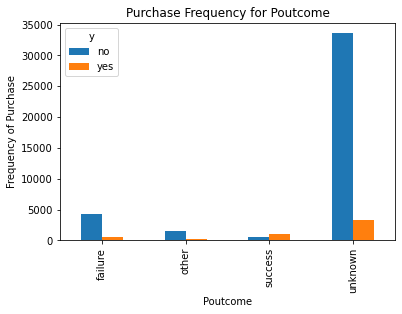

In [86]:
pd.crosstab(df.poutcome,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')

Poutcome seems to be a good predictor of the outcome variable.

# Creating Dummies

In [10]:
df=pd.get_dummies(df)
df.head()                # Creating dummies for all the categorical data

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_admin.           45211 non-null  uint8
 8   job_blue-collar      45211 non-null  uint8
 9   job_entrepreneur     45211 non-null  uint8
 10  job_housemaid        45211 non-null  uint8
 11  job_management       45211 non-null  uint8
 12  job_retired          45211 non-null  uint8
 13  job_self-employed    45211 non-null  uint8
 14  job_services         45211 non-null  uint8
 15  job_student          45211 non-null  uint8
 16  job_technician       4

We have total of 51 features and one output variable (y_no or y_yes)

# Model Creation

In [12]:
# X--> All columns except y
# Y--> column "y"

x=df.iloc[:,0:51]
y=df.iloc[:,52]    # Taking only y_yes--> yes=1, no=0

In [13]:
# Sepearting testing and training data--> 30% of the data will be testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=8) 

In [14]:
x_train.shape

(31647, 51)

In [15]:
y_train.shape

(31647,)

In [16]:
# Logistic Regression and fit the model

classifier=LogisticRegression(max_iter=500)
classifier.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [17]:
classifier.intercept_

array([-0.63558198])

In [18]:
classifier.coef_

array([[ 1.71538001e-03,  1.37930300e-05, -7.68430194e-03,
         4.10625313e-03, -9.07273437e-02, -1.35042201e-03,
         2.27455786e-03,  9.52397381e-02, -4.23340708e-01,
        -2.05920713e-01, -1.46341339e-01, -6.35304420e-02,
         4.31492739e-01, -1.09916312e-01, -2.25294890e-01,
         1.85793210e-01, -1.57966833e-01,  8.64465342e-03,
        -2.21818938e-02, -1.45771729e-01, -5.23285562e-01,
         3.57345000e-02, -3.55377422e-01, -2.38311986e-01,
        -2.01309863e-02, -1.95023960e-02, -4.80575703e-01,
        -1.52747088e-01,  2.71774775e-02, -6.60500268e-01,
         6.74195256e-02, -7.00742316e-01,  2.92192627e-01,
         5.94692182e-02, -9.84984636e-01,  2.61367685e-01,
        -4.95541145e-01,  1.37682003e-01, -4.26125178e-02,
        -3.37190940e-01, -5.56183427e-01,  4.56336758e-02,
         5.49617436e-01, -4.65309555e-01, -5.46691684e-01,
         4.86958584e-01,  3.28947094e-01, -7.03011370e-01,
        -2.77724197e-01,  1.51431066e+00, -1.16689788e+0

# Testing the Model

In [19]:
# Checking the model accuracy for the training data
y_train_pred=classifier.predict(x_train)

In [20]:
ac(y_train_pred,y_train)

0.9011596675830252

In [21]:
# Checking the model accuracy for testing data
y_test_pred=classifier.predict(x_test)

In [22]:
ac(y_test_pred,y_test)

0.9006930109112357

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(y_test,y_test_pred)    # Confusion matrix for testing data

array([[11660,   292],
       [ 1055,   557]], dtype=int64)

In [25]:
confusion_matrix(y_train,y_train_pred)   # Confusion matrix for training data

array([[27278,   692],
       [ 2436,  1241]], dtype=int64)

In [26]:
print(classification_report(y_test,y_test_pred))   # Classification report for the testing data

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11952
           1       0.66      0.35      0.45      1612

    accuracy                           0.90     13564
   macro avg       0.79      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [27]:
print(classification_report(y_train,y_train_pred))   # Classification report for the training data

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     27970
           1       0.64      0.34      0.44      3677

    accuracy                           0.90     31647
   macro avg       0.78      0.66      0.69     31647
weighted avg       0.89      0.90      0.89     31647



# The accuracy of model on testing data is 90.12% and on training data it is 90.06%

# ROC curve & AUC

In [87]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

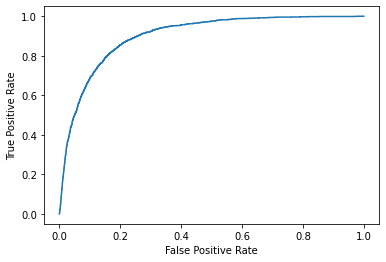

In [92]:
y_pred_prob = classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [93]:
auc=roc_auc_score(y_test,y_pred_prob)

In [94]:
print("The AUC Score is: ",auc)

The AUC Score is:  0.9006313197371787


The closer AUC is to 1, the better the model.

# The AUC for this logistic regression model turns out to be 0.901. Since this is close to 1, this confirms that the model does a great job of classifying data.